# ***PREDICTING WHETHER THE PATIENT HAS 10 YEAR RISK OF FUTURE CORONARY HEART DIESEASE(CHD)***



---





# IMPORT LIBRARIES

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [ ]:
from google.colab import files
uploaded=files.upload()

Saving framingham.csv to framingham.csv


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

User uploaded file "framingham.csv" with length 195955 bytes


In [ ]:
import io
data = pd.read_csv(io.StringIO(uploaded['framingham.csv'].decode('utf-8')))
data.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


In [ ]:
data.describe()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
count,4238.000000,4238.000000,4133.000000,4238.000000,4209.000000,4185.000000,4238.000000,4238.000000,4238.000000,4188.000000,4238.000000,4238.000000,4219.000000,4237.000000,3850.000000,4238.000000
mean,0.429212,49.584946,1.978950,0.494101,9.003089,0.029630,0.005899,0.310524,0.025720,236.721585,132.352407,82.893464,25.802008,75.878924,81.966753,0.151958
std,0.495022,8.572160,1.019791,0.500024,11.920094,0.169584,0.076587,0.462763,0.158316,44.590334,22.038097,11.910850,4.080111,12.026596,23.959998,0.359023
min,0.000000,32.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,107.000000,83.500000,48.000000,15.540000,44.000000,40.000000,0.000000
25%,0.000000,42.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,206.000000,117.000000,75.000000,23.070000,68.000000,71.000000,0.000000
50%,0.000000,49.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,234.000000,128.000000,82.000000,25.400000,75.000000,78.000000,0.000000
75%,1.000000,56.000000,3.000000,1.000000,20.000000,0.000000,0.000000,1.000000,0.000000,263.000000,144.000000,89.875000,28.040000,83.000000,87.000000,0.000000
max,1.000000,70.000000,4.000000,1.000000,70.000000,1.000000,1.000000,1.000000,1.000000,696.000000,295.000000,142.500000,56.800000,143.000000,394.000000,1.000000


In [ ]:
data = data.fillna(0)
y = data.TenYearCHD.values
x_data = data.drop(["TenYearCHD"],axis = 1)

In [ ]:
x_data

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0
4235,0,48,2.0,1,20.0,0.0,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,0.0


# NORMALIZING DATA

In [ ]:
x = (x_data - np.min(x_data)) / (np.max(x_data)-np.min(x_data)).values
print(x)

      male       age  education  ...       BMI  heartRate   glucose
0      1.0  0.184211       1.00  ...  0.474824   0.559441  0.195431
1      0.0  0.368421       0.50  ...  0.505810   0.664336  0.192893
2      1.0  0.421053       0.25  ...  0.446127   0.524476  0.177665
3      0.0  0.763158       0.75  ...  0.503169   0.454545  0.261421
4      0.0  0.368421       0.75  ...  0.406690   0.594406  0.215736
...    ...       ...        ...  ...       ...        ...       ...
4233   1.0  0.473684       0.25  ...  0.457218   0.461538  0.218274
4234   1.0  0.500000       0.75  ...  0.347007   0.454545  0.172589
4235   0.0  0.421053       0.50  ...  0.387324   0.587413  0.218274
4236   0.0  0.315789       0.25  ...  0.337324   0.601399  0.000000
4237   0.0  0.526316       0.50  ...  0.377993   0.559441  0.271574

[4238 rows x 15 columns]


# SPLITTING DATA INTO TRAIN DATA AND TEST DATA

In [ ]:
#diving data   test data = 20%     train data = 80%

from sklearn.model_selection import train_test_split

x_train , x_test , y_train , y_test = train_test_split(x,y, test_size = 0.2, random_state = 10)

x_train = x_train.T
x_test = x_test.T
y_train = y_train.T
y_test = y_test.T

print("x_train: ",x_train.shape)   
print("x_test: ",x_test.shape)
print("y_train: ",y_train.shape)
print("y_test: ",y_test.shape)

x_train:  (15, 3390)
x_test:  (15, 848)
y_train:  (3390,)
y_test:  (848,)


# PARAMETER INITIALIZING 

# CREATING SIGMOID FUNCTION

In [ ]:
def initialize_weights_and_bias(dimension):
     
    weight = np.full((dimension,1),10) 
    bias = 0.0
    return weight,bias


def sigmoid(z):
    
    y_head = 1/(1+ np.exp(-z))
    return y_head       
print(sigmoid(0))

0.5


In [ ]:
def forward_backward_propagation(w,b,x_train,y_train):
    # forward propagation

    z = np.dot(w.T,x_train) + b                                                                                                 # Logistic regression equation = z = b + px1w1 + px2w2 + ... + px4096*w4096 
    y_head = sigmoid(z) 
    loss = -y_train*np.log(y_head)-(1-y_train)*np.log(1-y_head)                                                                 #loss function
    cost = (np.sum(loss))/x_train.shape[1]                                                                                      # x_train.shape[1]  is for scaling
    
    

  
    derivative_weight = (np.dot(x_train,((y_head-y_train).T)))/x_train.shape[1]                                                  # x_train.shape[1]  is for scaling

    derivative_bias = np.sum(y_head-y_train)/x_train.shape[1]                                                                    # x_train.shape[1]  is for scaling

    gradients = {"derivative_weight": derivative_weight,"derivative_bias": derivative_bias} 
    
    return cost,gradients

In [ ]:
def update(w, b, x_train, y_train, learning_rate,number_of_iterarion):
    cost_list = []  #to save all costs
    cost_list2 = []
    index = []
    
    # updating(learning) parameters is number_of_iterarion times
    
    for i in range(number_of_iterarion):
        # make forward and backward propagation and find cost and gradients
        cost,gradients = forward_backward_propagation(w,b,x_train,y_train)
        cost_list.append(cost)

        # lets update
        w = w - learning_rate * gradients["derivative_weight"]
        b = b - learning_rate * gradients["derivative_bias"]

        if i % 10 == 0: #to show every 10 elements
            cost_list2.append(cost)
            index.append(i)
            print ("Cost after iteration %i: %f" %(i, cost))

    # we update(learn) parameters weights and bias
    parameters = {"weight": w,"bias": b}
    plt.plot(index,cost_list2)
    plt.xticks(index,rotation='vertical')
    plt.xlabel("Number of Iterarion")
    plt.ylabel("Cost")
    plt.show()
    return parameters, gradients, cost_list

In [ ]:
def predict(w,b,x_test):
    # x_test is a input for forward propagation
    z = sigmoid(np.dot(w.T,x_test)+b)
    Y_prediction = np.zeros((1,x_test.shape[1]))

    # if z is bigger than 0.5, our prediction is sign one (y_head=1),
    # if z is smaller than 0.5, our prediction is sign zero (y_head=0),
    for i in range(z.shape[1]):
        if z[0,i]<= 1:
            Y_prediction[0,i] = 0
        else:
            Y_prediction[0,i] = 1

    return Y_prediction

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: RuntimeWarning: invalid value encountered in multiply
  


Cost after iteration 0: nan
Cost after iteration 10: 1.521975
Cost after iteration 20: 0.898643
Cost after iteration 30: 0.844830
Cost after iteration 40: 0.797227
Cost after iteration 50: 0.755547
Cost after iteration 60: 0.719425
Cost after iteration 70: 0.688351
Cost after iteration 80: 0.661721
Cost after iteration 90: 0.638862


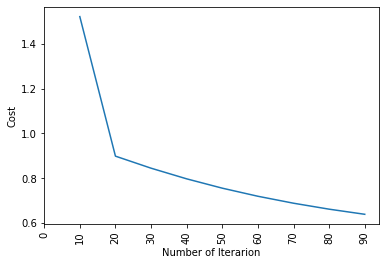

test accuracy: 87.14622641509433 %


In [ ]:
def logistic_regression(x_train, y_train, x_test, y_test, learning_rate ,  num_iterations):
    # initialize
    dimension =  x_train.shape[0]  # that is 15
    w,b = initialize_weights_and_bias(dimension)
    
    # do not change learning rate
    parameters, gradients, cost_list = update(w, b, x_train, y_train, learning_rate,num_iterations)
    
    y_prediction_test = predict(parameters["weight"],parameters["bias"],x_test)

    # Print train/test Errors
    print("test accuracy: {} %".format(100 - np.mean(np.abs(y_prediction_test - y_test)) * 100))
    
logistic_regression(x_train, y_train, x_test, y_test,learning_rate = 2.1, num_iterations = 100)